In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df_lip=pd.read_csv('prot-lip_cutoff5.data.dat', sep=',', header=None, names=["res","contactfreqLIP"])
df_PS=pd.read_csv('prot-PS_cutoff5.data.dat', sep=',', header=None, names=["res","contactfreqPS"])
df_PC=pd.read_csv('prot-PC_cutoff5.data.dat', sep=',', header=None, names=["res","contactfreqPC"])

In [3]:
df_lip.head()

,res,contactfreqLIP
0,576,0.10
1,577,0.18
2,628,0.10
3,630,0.02
4,655,0.02


In [4]:
result = df_lip.merge(df_PS,how='outer').merge(df_PC,how='outer').fillna(0)

In [5]:
print(result)

      res  contactfreqLIP  contactfreqPS  contactfreqPC
0     576            0.10           0.02           0.08
1     577            0.18           0.02           0.16
2     628            0.10           0.00           0.10
3     630            0.02           0.00           0.02
4     655            0.02           0.02           0.00
..    ...             ...            ...            ...
234  2180            8.73           5.55           3.88
235  2181           29.55           9.31          22.67
236  2182           85.35          21.98          80.86
237  2183           49.67           5.78          45.78
238  2187           43.06          42.22           1.57

[239 rows x 4 columns]


In [6]:
#hist=result.hist()

Text(0, 0.5, 'contact freq')

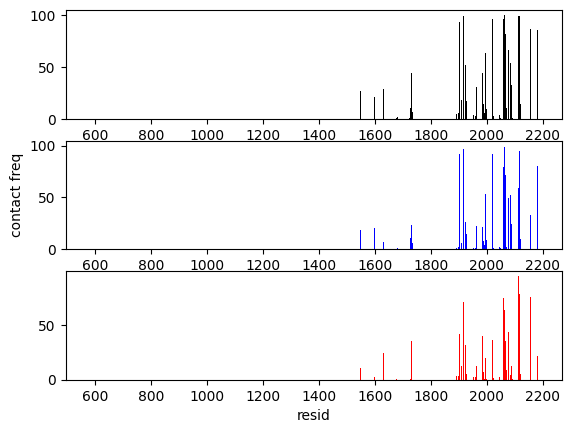

In [7]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
ax1.bar(result.res,result.contactfreqLIP,color='black')
ax2.bar(result.res,result.contactfreqPC,color='blue')
ax3.bar(result.res,result.contactfreqPS,color='red')
ax3.set_xlabel('resid')
ax2.set_ylabel('contact freq')

In [8]:
#fig.savefig("contactfreqfig.pdf")

In [9]:
df_LIP_repl1=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest/prot-lip_cutoff5.data.dat', sep=',', header=None, names=["res","cf1"])
df_LIP_repl2=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.2/prot-lip_cutoff5.data.dat', sep=',', header=None, names=["res","cf2"])
df_LIP_repl3=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.3/prot-lip_cutoff5.data.dat', sep=',', header=None, names=["res","cf3"])
result_LIP = df_LIP_repl1.merge(df_LIP_repl2,how='outer').merge(df_LIP_repl3,how='outer').fillna(0)

df_PC_repl1=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest/prot-PC_cutoff5.data.dat', sep=',', header=None, names=["res","cf1"])
df_PC_repl2=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.2/prot-PC_cutoff5.data.dat', sep=',', header=None, names=["res","cf2"])
df_PC_repl3=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.3/prot-PC_cutoff5.data.dat', sep=',', header=None, names=["res","cf3"])
result_PC = df_PC_repl1.merge(df_PC_repl2,how='outer').merge(df_PC_repl3,how='outer').fillna(0)

df_PS_repl1=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest/prot-PS_cutoff5.data.dat', sep=',', header=None, names=["res","cf1"])
df_PS_repl2=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.2/prot-PS_cutoff5.data.dat', sep=',', header=None, names=["res","cf2"])
df_PS_repl3=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.3/prot-PS_cutoff5.data.dat', sep=',', header=None, names=["res","cf3"])
result_PS = df_PS_repl1.merge(df_PS_repl2,how='outer').merge(df_PS_repl3,how='outer').fillna(0)

In [10]:
new_df_LIP = pd.DataFrame(data=[result_LIP.cf1,result_LIP.cf2,result_LIP.cf3])
new_df_PC = pd.DataFrame(data=[result_PC.cf1,result_PC.cf2,result_PC.cf3])
new_df_PS = pd.DataFrame(data=[result_PS.cf1,result_PS.cf2,result_PS.cf3])

In [11]:
new_df_LIP

,0,1,2,3,4,5,6,7,8,9,...,447,448,449,450,451,452,453,454,455,456
cf1,0.1,0.18,0.1,0.02,0.02,0.04,48.63,46.71,32.57,27.31,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
cf2,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.24,0.02,0.14,0.51,0.00,0.00,0.00,0.00,0.00,0.00
cf3,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.08,0.00,0.00,1.12,0.33,3.22,0.02,0.08,0.04,0.22


In [12]:
new_df_LIP.mean()

0      0.033333
1      0.060000
2      0.033333
3      0.006667
4      0.006667
         ...   
452    1.073333
453    0.006667
454    0.026667
455    0.013333
456    0.073333
Length: 457, dtype: float64

In [13]:
print('ok')

ok


In [14]:
## fig, (ax1,ax2,ax3) = plt.subplots(3,1)
ax1.bar(result_LIP.res,new_df_LIP.mean(),color='black',label='all lipids (PC+PS)')
ax2.bar(result_PC.res,new_df_PC.mean(),color='blue',label='PC')
ax3.bar(result_PS.res,new_df_PS.mean(),color='red',label='PS')
ax3.set_xlabel('Residue')
ax2.set_ylabel('<Contact frequency> [%]')
ax1.set_xlim([1500,2200])
ax2.set_xlim([1500,2200])
ax3.set_xlim([1500,2200])
ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
ax3.legend(loc="upper left")

#domain spec
ax1.plot([1550,1876],[110,110], 'g-', lw=5)
ax1.plot([1879,2033],[110,110], 'b-', lw=5)
ax1.plot([2038,2193],[110,110], 'r-', lw=5)
ax1.text(1800,120,'A3',c='green')
ax1.text(1950,120,'C1',c='blue')
ax1.text(2150,120,'C2',c='red')

Text(2150, 120, 'C2')

In [15]:
fig.savefig("/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq/contactfreq_avg.pdf")

In [16]:
cc_LIP=pd.concat([result_LIP,new_df_LIP.mean()],axis=1)
cc_PC=pd.concat([result_PC,new_df_PC.mean()],axis=1)
cc_PS=pd.concat([result_PS,new_df_PS.mean()],axis=1)

In [17]:
cc_LIP=cc_LIP.rename(columns = {0:'meanLIP'})
cc_PC=cc_PC.rename(columns = {0:'meanPC'})
cc_PS=cc_PS.rename(columns = {0:'meanPS'})

In [18]:
cc_LIP=cc_LIP.drop(['cf1','cf2','cf3'],axis=1)
cc_PC=cc_PC.drop(['cf1','cf2','cf3'],axis=1)
cc_PS=cc_PS.drop(['cf1','cf2','cf3'],axis=1)

In [19]:
comb=cc_LIP.merge(cc_PC,how='outer').merge(cc_PS,how='outer').fillna(0)

In [20]:
comb.head()

,res,meanLIP,meanPC,meanPS
0,576,0.033333,0.026667,0.006667
1,577,0.060000,0.053333,0.006667
2,628,0.033333,0.033333,0.000000
3,630,0.006667,0.006667,0.000000
4,655,0.006667,0.000000,0.006667


(0.0, 100.0)

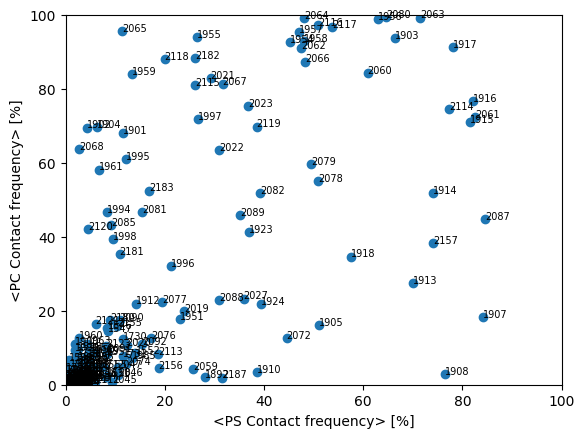

In [21]:
fig, ax = plt.subplots()

ax.scatter(comb.meanPS,comb.meanPC)
ax.set_xlabel('<PS Contact frequency> [%]')
ax.set_ylabel('<PC Contact frequency> [%]')

for i, txt in enumerate(comb.res):
    ax.annotate(txt, (comb.meanPS[i], comb.meanPC[i]),size=7)

ax.set_ylim([0,100])
ax.set_xlim([0,100])


In [22]:
comb

,res,meanLIP,meanPC,meanPS
0,576,0.033333,0.026667,0.006667
1,577,0.060000,0.053333,0.006667
2,628,0.033333,0.033333,0.000000
3,630,0.006667,0.006667,0.000000
4,655,0.006667,0.000000,0.006667
...,...,...,...,...
452,2025,1.073333,1.073333,0.000000
453,2053,0.006667,0.006667,0.000000
454,2054,0.026667,0.026667,0.000000
455,2132,0.013333,0.013333,0.000000


In [23]:
col=np.multiply( np.sin(math.pi/4 - np.arctan(comb.meanPC/comb.meanPS)), np.sqrt(comb.meanPC*comb.meanPC+comb.meanPS*comb.meanPS))

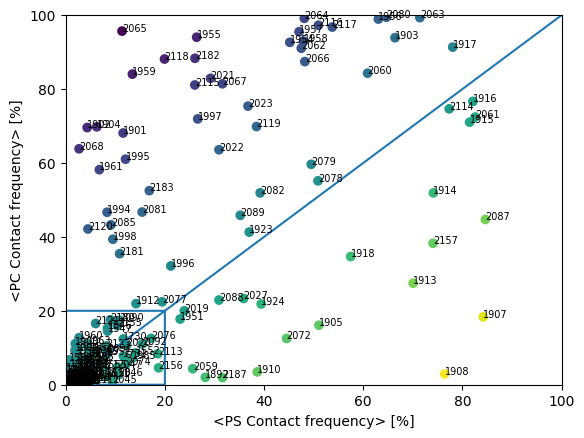

In [24]:
fig, ax = plt.subplots()

ax.scatter(comb.meanPS,comb.meanPC,c=col)
ax.set_xlabel('<PS Contact frequency> [%]')
ax.set_ylabel('<PC Contact frequency> [%]')
ax.plot([0,20,20,0,0,100],[0,0,20,20,0,100])
for i, txt in enumerate(comb.res):
    ax.annotate(txt, (comb.meanPS[i], comb.meanPC[i]),size=7)
    
ax.set_ylim([0,100])
ax.set_xlim([0,100])
fig.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq_scatter/contactscatter.pdf')

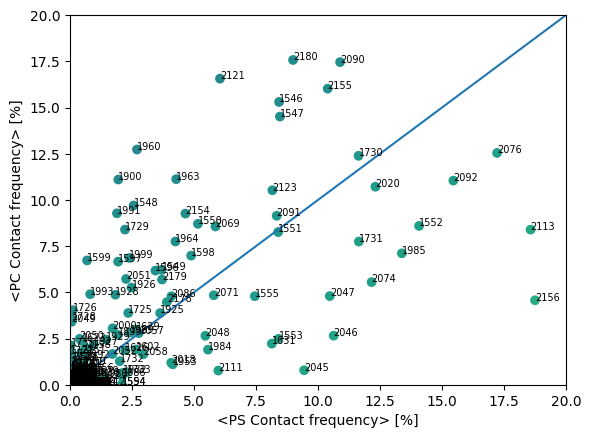

In [25]:
fig, ax = plt.subplots()

ax.scatter(comb.meanPS,comb.meanPC,c=col)
ax.set_xlabel('<PS Contact frequency> [%]')
ax.set_ylabel('<PC Contact frequency> [%]')
ax.set_ylim([0,20])
ax.set_xlim([0,20])
ax.plot([0,20],[0,20])
for i, txt in enumerate(comb.res):
    ax.annotate(txt, (comb.meanPS[i], comb.meanPC[i]),size=7)
    

fig.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq_scatter/contactscatter_0_20.pdf')

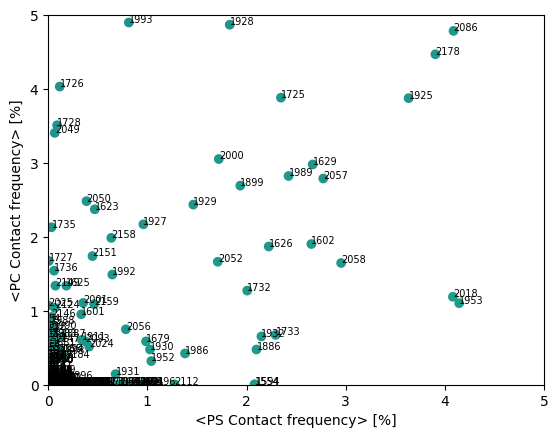

In [26]:
fig, ax = plt.subplots()

ax.scatter(comb.meanPS,comb.meanPC,c=col)
ax.set_xlabel('<PS Contact frequency> [%]')
ax.set_ylabel('<PC Contact frequency> [%]')
ax.set_ylim([0,5])
ax.set_xlim([0,5])
for i, txt in enumerate(comb.res):
    ax.annotate(txt, (comb.meanPS[i], comb.meanPC[i]),size=7)
    

fig.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq_scatter/contactscatter_0_5.pdf')